# How to Perform Various Vision Tasks Using YOLO


This notebook demonstrates how to perform essential computer vision tasks using Ultralytics YOLO, a state-of-the-art framework for real-time image analysis. The exercises use pretrained YOLO models, which have been trained on the COCO (Common Objects in Context) dataset — a large collection of annotated images containing everyday objects such as people, animals, vehicles, and tools. By leveraging these pretrained models, the notebook shows how YOLO can detect and classify multiple objects within images, providing bounding boxes and segmentation masks with high accuracy. Through simple examples in Google Colab, users will see how these models recognize visual patterns and understand the practical foundation of YOLO’s approach to object detection and image understanding.

Lets explore. three main tasks

1- Object Detection
2- Image Segmentation
3- Classification


In [ ]:
%pip install ultralytics

In [36]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from ultralytics import YOLO

In [37]:
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/vision/main/IMG_8866.jpg
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/vision/main/IMG_4552.JPG
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/vision/main/IMG_2144.JPG
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/vision/main/cat.jpeg

--2025-10-10 19:41:39--  https://raw.githubusercontent.com/PlantHealth-Analytics/vision/main/IMG_8866.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94368 (92K) [image/jpeg]
Saving to: ‘IMG_8866.jpg.2’

IMG_8866.jpg.2      100%[===================>]  92.16K  --.-KB/s    in 0.05s   

2025-10-10 19:41:39 (1.80 MB/s) - ‘IMG_8866.jpg.2’ saved [94368/94368]

--2025-10-10 19:41:39--  https://raw.githubusercontent.com/PlantHealth-Analytics/vision/main/IMG_4552.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386450 (377K) [image/

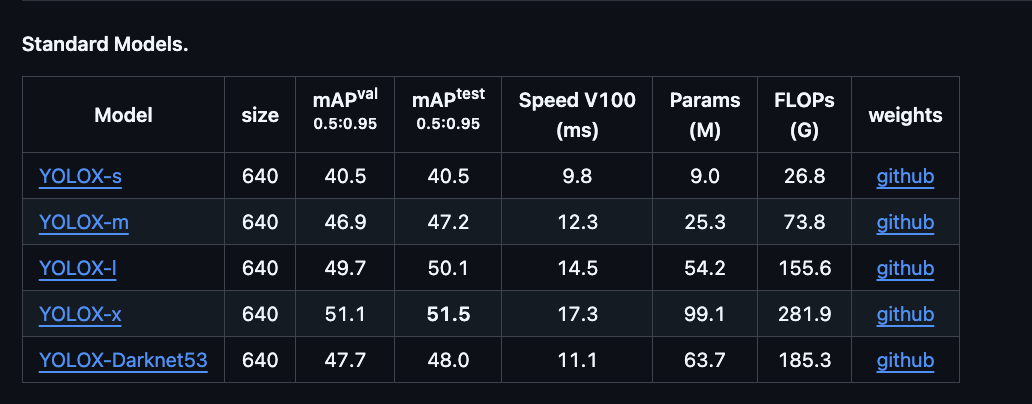

# Object Detection

In [38]:
model = YOLO("yolo11n.pt")


image 1/1 /content/IMG_2144.JPG: 640x480 1 dog, 171.3ms
Speed: 12.9ms preprocess, 171.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


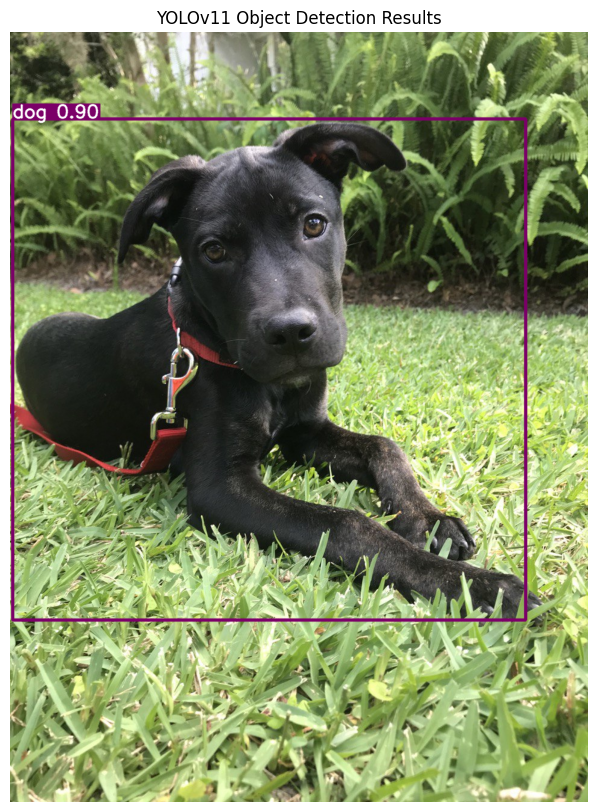

In [39]:
obj = model.predict("IMG_2144.JPG")
plt.figure(figsize=(10, 10))  # set figure size
plt.title("YOLOv11 Object Detection Results")  # set title
plt.axis('off')  # hide axes
plt.imshow(cv2.cvtColor(obj[0].plot(), cv2.COLOR_BGR2RGB))  # plot results

# Image Segmentation

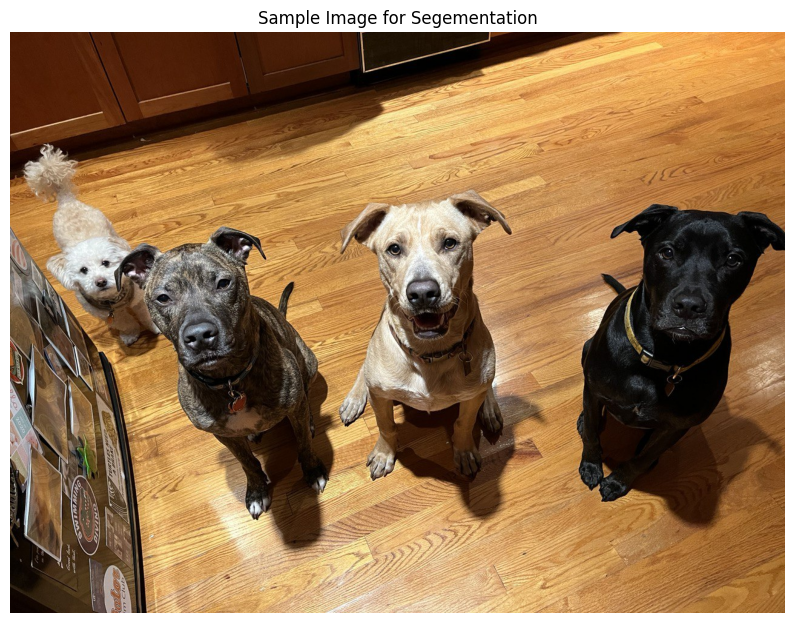

In [40]:
sample = Image.open('IMG_4552.JPG').convert('RGB')
plt.figure(figsize=(10, 10))
plt.title('Sample Image for Segementation')
plt.axis('off')
plt.imshow(sample)

In [41]:
# Load a model
model = YOLO("yolo11x-seg.pt")  # load an official model
#model = YOLO("yolo11n-seg.pt")  # try n load an official model
# Predict with the model
segments = model("IMG_4552.JPG")



image 1/1 /content/IMG_4552.JPG: 480x640 4 dogs, 6690.0ms
Speed: 9.2ms preprocess, 6690.0ms inference, 20.5ms postprocess per image at shape (1, 3, 480, 640)


In [42]:
segments[0].verbose()

'4 dogs, '

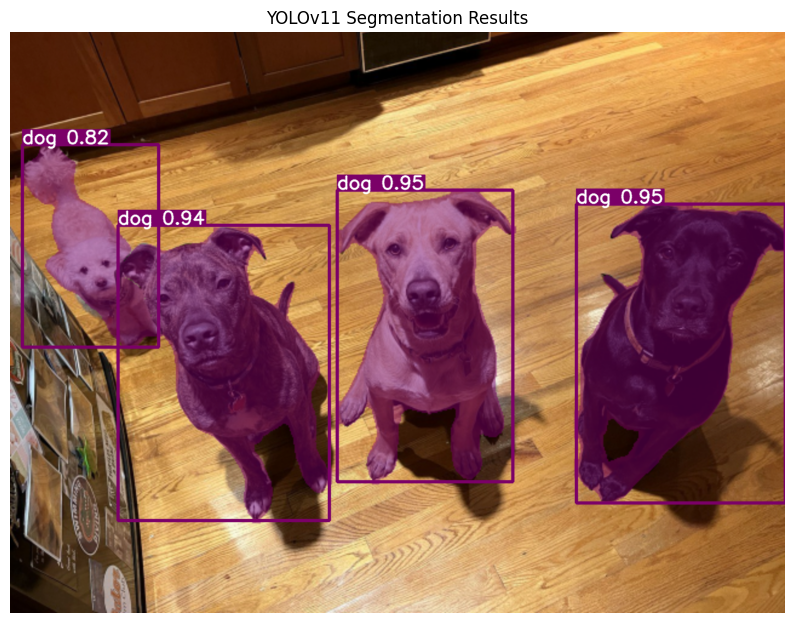

In [43]:
plt.figure(figsize=(10, 10))  # set figure size
plt.title("YOLOv11 Segmentation Results")  # set title
plt.axis('off')  # hide axes
plt.imshow(cv2.cvtColor(segments[0].plot(), cv2.COLOR_BGR2RGB))  # plot results

# Classification

In [44]:
model = YOLO("yolo11n-cls.pt")


image 1/1 /content/cat.jpeg: 224x224 tiger_cat 0.32, tabby 0.30, Egyptian_cat 0.29, lynx 0.02, jigsaw_puzzle 0.01, 33.7ms
Speed: 15.1ms preprocess, 33.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


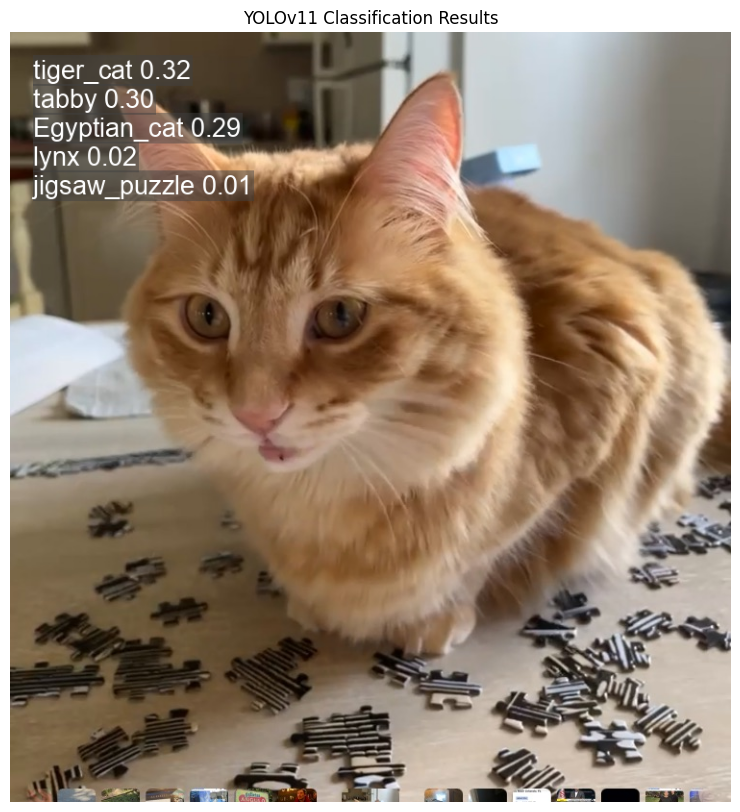

In [45]:
cls = model.predict("cat.jpeg")
plt.figure(figsize=(10, 10))  # set figure size
plt.title("YOLOv11 Classification Results")  # set title
plt.axis('off')  # hide axes
plt.imshow(cv2.cvtColor(cls[0].plot(), cv2.COLOR_BGR2RGB))  # plot results